# Summary tables for presentation

In this workbook, I render figures for presentation in the paper. This involves creating summary tables and tabulations, and also mocking up the estimation results. One substantive aspect of this is developing the bounds for a preliminary analysis along the lines of [Manski (2007)](https://www.amazon.com/Identification-Prediction-Decision-Charles-Manski/dp/0674026535/ref=asap_bc?ie=UTF8).

First: set up the python `ipystata` package, and changing the directory to the right place. I begin by describing the data.

**Note:** The table for aggregate data, and the figure of the battle, were both produced manually. So, they are not created by the routines described here, but are instead just placed in the `TablesFigures` directory.

In [7]:
import ipystata
import os

cd = os.getcwd()
cdl = [cd]

In [8]:
%%stata -s gl -i cdl
chdir "`cdl'"

clear all 
set more off 

use "`cdl'\DataFiles\WorkingData.dta"

describe, simple


C:\Users\mjbaker\Documents\GitHub\CivilWarSurgery

type         regstate     remarks      operated     td3          td7          td11         Oh16         Il13         Oh114        longname
case         injury       otherbattle  expoper      td4          td8          sev          In54         Mo29         Mo31         casualties
name         operation    misdum       td1          td5          td9          sev2         Oh42         In49         Oh58         lncas
regno        anesthetic   outcome      td2          td6          td10         Ky22         Ia04         Mo06         namelength



## Basic Cross-Tabulations

First, I cross-tabulate outcomes by surgery, with the aim of filling the reader in on the data just a little bit. The key program for doing this is `outreg2`, which can be a bit hard to use but has pretty good documentation. It is very flexible and can also be used to create summary tables. 

Because a `Stata` window is opened in the following block of code, one should be able to see what the tables look like in `Stata`.

In [9]:
%%stata -s gl -os

    gen all = 1
    label def out 0 "Did not survive" 1 "Survived" 
    label def op 0 "No Surgery" 1 "Surgery"
    label val outcome out
    label val operated op
    outreg2 outcome all using TablesFigures\crosstab.tex, cross label ///
        replace tex(frag) noaster
    outreg2 outcome operated using TablesFigures\crosstab.tex, cross label ///
        tex(frag) noaster


TablesFigures\crosstab.tex
dir : seeout

TablesFigures\crosstab.tex
dir : seeout



Our next step is to augment the data to include the additional cases as a point of illustration that the sample is better than the usual casualty statistics because the cases are more likely all hospital cases. To do this, we add back in cases that were "sent back to regiment. Since I add a few observations to the data, I first `preserve` the data and then `restore` it after. 

**Note:** For inclusion in the paper, both of these files are modified a bit to get the text right, and then are combined in the Tex code for the paper.

In [10]:
%%stata -s gl -os

preserve 

sum outcome
local N = r(N)
local obs = `N' + 18
local count = `N' + 1
set obs `obs'
replace sev = 0 in  `count'/`obs'
replace operated = 0 in `count'/`obs'
replace outcome = 1 in `count'/`obs'
replace type = "arm" in `count'/`obs'

sum outcome
local N = r(N)
local obs = `N' + 47
local count = `N' + 1
set obs `obs'
replace sev = 0 in  `count'/`obs'
replace operated = 0 in `count'/`obs'
replace outcome = 1 in `count'/`obs'
replace type = "neck, trunk shoulder" in `count'/`obs'

sum outcome
local N = r(N)
local obs = `N' + 8
local count = `N' + 1
set obs `obs'
replace sev = 0 in  `count'/`obs'
replace operated = 0 in `count'/`obs'
replace outcome = 1 in `count'/`obs'
replace type = "forearm" in `count'/`obs'

sum outcome
local N = r(N)
local obs = `N' + 20
local count = `N' + 1
set obs `obs'
replace sev = 0 in  `count'/`obs'
replace operated = 0 in `count'/`obs'
replace outcome = 1 in `count'/`obs'
replace type = "hand" in `count'/`obs'

sum outcome
local N = r(N)
local obs = `N' + 19
local count = `N' + 1
set obs `obs'
replace sev = 0 in  `count'/`obs'
replace operated = 0 in `count'/`obs'
replace outcome = 1 in `count'/`obs'
replace type = "thigh" in `count'/`obs'

sum outcome
local N = r(N)
local obs = `N' + 5
local count = `N' + 1
set obs `obs'
replace sev = 0 in  `count'/`obs'
replace operated = 0 in `count'/`obs'
replace outcome = 1 in `count'/`obs'
replace type = "knee" in `count'/`obs'

sum outcome
local N = r(N)
local obs = `N' + 12
local count = `N' + 1
set obs `obs'
replace sev = 0 in  `count'/`obs'
replace operated = 0 in `count'/`obs'
replace outcome = 1 in `count'/`obs'
replace type = "leg" in `count'/`obs'

sum outcome
local N = r(N)
local obs = `N' + 5
local count = `N' + 1
set obs `obs'
replace sev = 0 in  `count'/`obs'
replace operated = 0 in `count'/`obs'
replace outcome = 1 in `count'/`obs'
replace type = "foot" in `count'/`obs'

replace all = 1
label val outcome out
label val operated op
outreg2 outcome all using TablesFigures\crosstab2.tex, cross label replace tex(frag) noaster
outreg2 outcome operated using TablesFigures\crosstab2.tex, cross label tex(frag) noaster	

restore


    Variable |        Obs        Mean    Std. Dev.       Min        Max
-------------+---------------------------------------------------------
     outcome |        498    .7831325     .412526          0          1

number of observations (_N) was 498, now 516

(18 real changes made)

(18 real changes made)

(18 real changes made)

(18 real changes made)

    Variable |        Obs        Mean    Std. Dev.       Min        Max
-------------+---------------------------------------------------------
     outcome |        516    .7906977    .4072054          0          1

number of observations (_N) was 516, now 563

(47 real changes made)

(47 real changes made)

(47 real changes made)

(47 real changes made)

    Variable |        Obs        Mean    Std. Dev.       Min        Max
-------------+---------------------------------------------------------
     outcome |        563    .8081705    .3940898          0          1

number of observations (_N) was 563, now 571

(8 real changes ma

# Manski bounds 

In the following, I create s simple table of the Manski bounds for the data. The idea is straightforward, and goes (roughly) as follows. What one cares about is often an outcome based on a treatment. In our case, this is the outcome survival based on surgery. So, we might write this as $P(\textrm{survive }|\textrm{ surgery})$ across the whole population. 

What we actually observe, however, is *the probability of survival given surgery among those who actually received surgery*. That is, we observe $P(\textrm{survive }|\textrm{ surgery}, \textrm{ surgery}=1)$. So, we can write the whole thing above as:

$$
P(\textrm{surv. }|\textrm{ surg.}) = P(\textrm{surv. }|\textrm{ surg.}, \textrm{ surg.}=1)P(\textrm{ surg.}=1)+
P(\textrm{surv. }|\textrm{ surg.}, \textrm{ surg.}=0)P(\textrm{ surg.}=0)
$$

The problem here is that we observe everything in the above, except for $P(\textrm{surv. }|\textrm{ surg.}, \textrm{ surg.}=0)$ - that is, we do not observe the probability of survival given surgery among those who did not receive surgery. And in fact, this could be anything between zero and one! In the former case, all soldiers who did not get surgery would have died if they did get surgery, and in the latter, all would have survived. While these are extreme cases, they serve to bound the universe of possibilities and the discussion.

So, first, I write up a bit of `Stata` code that produces the bounds in a clean way that can be easily applied.

In [12]:
%%stata -s gl


capture program drop manskibds
program manskibds, rclass
    version 14.2
    syntax varlist [if] [in]

    marksample touse 
    tempvar result treatment pt pnt pr_t pr_ub pr_lb

    local result    : word 1 of `varlist'
    local treatment : word 2 of `varlist'

    quietly sum `treatment' if `touse'
    scalar pt  = r(mean)
    scalar pnt = 1 - pt
    scalar N   = r(N)

    quietly sum `result' if (`treatment' & `touse')
    scalar Nt  = r(N)

    scalar pr_t = r(mean)

    scalar pr_ub = pr_t*pt + pnt
    scalar pr_lb = pr_t*pt
    
    quietly sum `result' if (`treatment' == 0 & `touse')
    scalar pr_nt = r(mean)

    disp as text "  Upper bound         : " pr_ub
    disp as text "  Success,treated     : " pr_t
    disp as text "  Success,no treat    : " pr_nt
    disp as text "  Lower bound         : " pr_lb
    disp as text "  Total N, %treated N : " N ", " Nt/N

    return scalar pr_ub = pr_ub
    return scalar pr_t  = pr_t
    return scalar pr_nt = pr_nt
    return scalar pr_lb = pr_lb
    return scalar N     = N
    return scalar Nt    = Nt
    
end


  1.     version 14.2
  2.     syntax varlist [if] [in]
  3. 
  4.     tempvar result treatment pt pnt pr_t pr_ub pr_lb
  5. 
  6.     local treatment : word 2 of `varlist'
  7. 
  8.     scalar pt  = r(mean)
  9.     scalar pnt = 1 - pt
 10.     scalar N   = r(N)
 11. 
 12.     scalar Nt  = r(N)
 13. 
 14. 
 15.     scalar pr_lb = pr_t*pt
 16.     
 17.     scalar pr_nt = r(mean)
 18. 
 19.     disp as text "  Success,treated     : " pr_t
 20.     disp as text "  Success,no treat    : " pr_nt
 21.     disp as text "  Lower bound         : " pr_lb
 22.     disp as text "  Total N, %treated N : " N ", " Nt/N
 23. 
 24.     return scalar pr_t  = pr_t
 25.     return scalar pr_nt = pr_nt
 26.     return scalar pr_lb = pr_lb
 27.     return scalar N     = N
 28.     return scalar Nt    = Nt
 29.     



In the code below, we present the bounds for the different things. First, we do the overall bounds; then the bounds for wounds to the hand (`td5`), arm (`td1`), forearm (`td4`), and elbow (`td2`); then the bounds for the head (`td6`), and finally for cases that are more severe. 

In [13]:
%%stata -s gl -os

manskibds outcome operated  
manskibds outcome operated if td1 | td2 | td3 | td4 | td5
manskibds outcome operated if td6 | td7 | td8 | td9 | td10 | td11 
manskibds outcome operated if sev > .52



  Upper bound         : .94779116
  Success,treated     : .82550336
  Success,no treat    : .76504298
  Lower bound         : .24698795
  Total N, %treated N : 498, .29919679

  Upper bound         : .94736842
  Success,treated     : .87837838
  Success,no treat    : .87628866
  Lower bound         : .38011696
  Total N, %treated N : 171, .43274854

  Upper bound         : .94801223
  Success,treated     : .77333333
  Success,no treat    : .72222222
  Lower bound         : .17737003
  Total N, %treated N : 327, .2293578

  Upper bound         : .88679245
  Success,treated     : .8
  Success,no treat    : .50724638
  Lower bound         : .45283019
  Total N, %treated N : 159, .56603774



The next bit of code just writes the above into a Latex file for Python:

In [14]:
%%writefile "TablesFigures\manskibounds.tex"
\begin{tabular}{lccccc} \hline \hline
                     &  \%Survived, & \%Survived,  &Lower  & Upper & Cases,  \\
                     & procedure    & no procedure & bound & bound & \%procedure \\ \hline
                     &              &              &       &       &                 \\
All                  & 0.826        &  0.765       & 0.247 & 0.948 & 498 (0.299)     \\
Extremity            & 0.878        &  0.876       & 0.380 & 0.945 & 171 (0.432)     \\
Non-extremity        & 0.773        &  0.722       & 0.177 & 0.948 & 327 (0.229)     \\
Severe Cases         & 0.800        &  0.507       & 0.450 & 0.887 & 159 (0.566)     \\ \hline
\end{tabular}


Overwriting TablesFigures\manskibounds.tex


Later in the paper, we also break this down by amputation and excision/resection. While I'm not sure we will use this, we will do the computations and make the tables so we have them if necessary. 

In [15]:
%%stata -s gl -os

gen amputation = expoper == 1

manskibds outcome amputation  
manskibds outcome amputation if td1 | td2 | td4 | td5
manskibds outcome amputation if sev > .52


  Upper bound         : .96586345
  Success,treated     : .79012346
  Success,no treat    : .78177458
  Lower bound         : .12851406
  Total N, %treated N : 498, .1626506

  Upper bound         : .9609375
  Success,treated     : .87804878
  Success,no treat    : .88505747
  Lower bound         : .28125
  Total N, %treated N : 128, .3203125

  Upper bound         : .91823899
  Success,treated     : .76785714
  Success,no treat    : .62135922
  Lower bound         : .27044025
  Total N, %treated N : 159, .35220126



The results are similar to what we had before and aren't really needed, so I don't include those in the paper.

In [17]:
%%stata -s gl 
gen excision  = expoper == 2

manskibds outcome excision  
manskibds outcome excision if td1 | td2 | td4 | td5
manskibds outcome excision if sev > .52


  Upper bound         : .98192771
  Success,treated     : .86764706
  Success,no treat    : .76976744
  Lower bound         : .1184739
  Total N, %treated N : 498, .13654618

  Upper bound         : .984375
  Success,treated     : .9047619
  Success,no treat    : .87850467
  Lower bound         : .1484375
  Total N, %treated N : 128, .1640625

  Upper bound         : .96855346
  Success,treated     : .85294118
  Success,no treat    : .624
  Lower bound         : .18238994
  Total N, %treated N : 159, .21383648



# Summary statistics

Here, we summarize all the data that we use in the analysis and print it in tabular form.

In [22]:
%%stata -s gl -os

global varlist sev td1 td2 td3 td4 td5 td6 td7 td8 longname casualties 
global varlist $varlist Ky22 Oh16 In54 Oh42 Ia04 Il13 Mo29
quietly reg outcome $varlist
outreg2 using TablesFigures\sumstats1.tex, sortvar($varlist) sum tex(frag) replace label

bysort outcome: outreg2 using TablesFigures\sumstats1.tex, sortvar(operated $varlist)  ///
    sum label tex(frag) append
bysort operated: outreg2 using TablesFigures\sumstats1.tex, sortvar(outcome $varlist) ///
    sum label tex(frag) append



    Variable |        Obs        Mean    Std. Dev.       Min        Max
-------------+---------------------------------------------------------
     outcome |        498    .7831325     .412526          0          1
         sev |        498    .5170683    .1966317          0          1
         td1 |        498    .0803213    .2720632          0          1
         td2 |        498    .0240964    .1535027          0          1
         td3 |        498    .0863454    .2811558          0          1
-------------+---------------------------------------------------------
         td4 |        498     .060241     .238172          0          1
         td5 |        498    .0923695     .289838          0          1
         td6 |        498    .0662651     .248995          0          1
         td7 |        498    .0582329    .2344189          0          1
         td8 |        498    .0361446    .1868375          0          1
-------------+-------------------------------------------------

We also have to get some significance stars on the above. Unfortunately that is a bit of a pain, so I will just cycle through all the requisite data points and do the t-tests, finally putting in the stars by hand.

In [28]:
%%stata -s gl -os

foreach var of global varlist {
    disp "`var'"
    ttest `var', by(outcome) unequal
    ttest `var', by(operated) unequal
}

ttest outcome, by(operated) unequal
ttest operated, by(outcome) unequal

sev

Two-sample t test with unequal variances
------------------------------------------------------------------------------
   Group |     Obs        Mean    Std. Err.   Std. Dev.   [95% Conf. Interval]
---------+--------------------------------------------------------------------
 Did not |     108    .6018519    .0169602    .1762558    .5682302    .6354735
Survived |     390    .4935897    .0099105    .1957166    .4741049    .5130746
---------+--------------------------------------------------------------------
combined |     498    .5170683    .0088113    .1966317    .4997563    .5343802
---------+--------------------------------------------------------------------
    diff |            .1082621    .0196435                .0695102     .147014
------------------------------------------------------------------------------
    diff = mean(Did not) - mean(Survived)                         t =   5.5113
Ho: diff = 0                     Satterthwaite's degrees of freedom =  186.562

    H

From the above, we need the following stars:

- When dividing by outcome  : 3 stars for sev, td5, and Ia04, two stars for Oh42 and Il13, one star for td1 and td6.
- When dividing by operated : 3 stars for sev, td1, td5, td6, casualties, and Mo29, two stars for td8 and In54, and 1 star for td2 and Ky22. 

# Graph of outcomes and locations

The following code produces the graph that mocks up location and other stuff. 


(499 missing values generated)

(33 real changes made)

(29 real changes made)

(101 real changes made)

(82 real changes made)

(65 real changes made)

(18 real changes made)

(40 real changes made)

(12 real changes made)

(43 real changes made)

(30 real changes made)

(46 real changes made)

(11 real changes made)

(11 real changes made)

(file TablesFigures\surgwithlocs.eps written in EPS format)



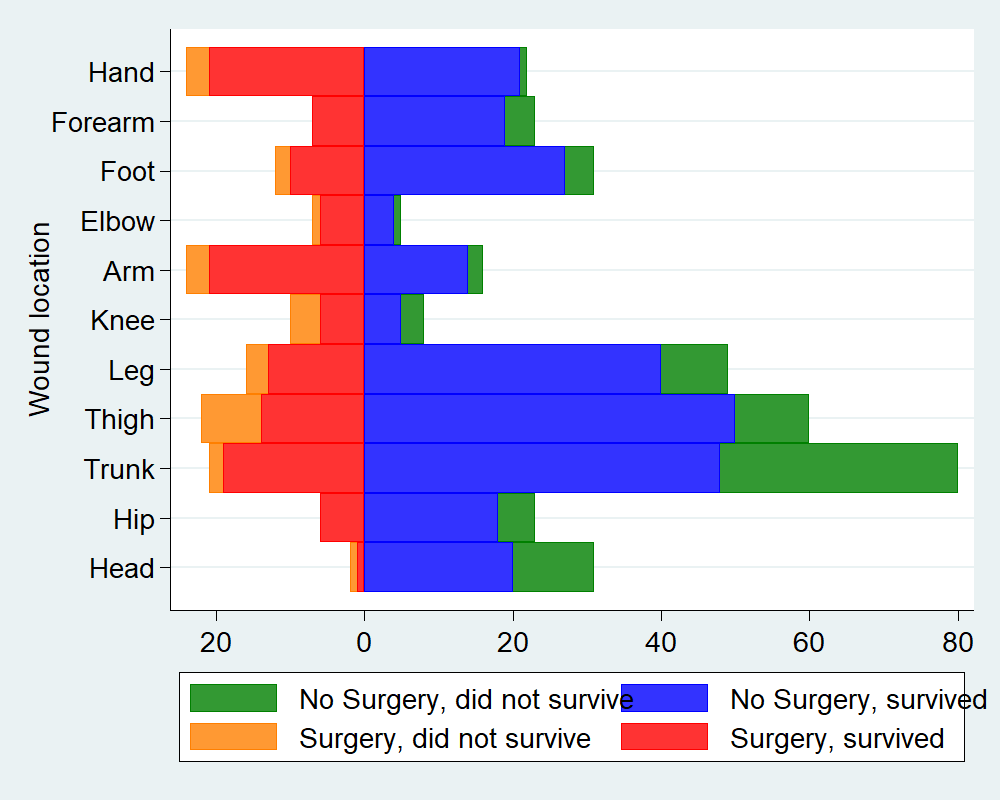

In [13]:
%%stata -s gl -gr
preserve
gen opcases     = operated == 1 
gen survived_op = outcome  == 1 & operated == 1
gen noopcases   = operated == 0
gen survived_no = outcome  == 1 & operated == 0 

gen     gtype = .
replace gtype = 1 if type  == "head"
replace gtype = 2 if type  == "hip"
replace gtype = 3 if type  == "neck, trunk shoulder" 
replace gtype = 4 if type  == "thigh"
replace gtype = 5 if type  == "leg"
replace gtype = 6 if type  == "knee"
replace gtype = 7 if type  == "arm"
replace gtype = 8 if type  == "elbow"
replace gtype = 9 if type  == "foot"
replace gtype = 10 if type == "forearm" 
replace gtype = 11 if type == "hand"

collapse (sum) opcases survived_op noopcases survived_no, by (gtype)

replace survived_op = - survived_op
replace opcases     = - opcases

twoway bar noopcases survived_no  gtype, horizontal color(green blue)         ///
    || bar opcases survived_op gtype, horizontal color(orange red)            ///
    legend(label(1 No Surgery, did not survive) label(2 No Surgery, survived) ///
    label(3 Surgery, did not survive ) label(4 Surgery, survived))            ///
    xlabel(-20 "20" 0 "0" 20 "20" 40 "40" 60 "60" 80 "80")                    ///
    ylabel( 1 "Head" 2 "Hip" 3 "Trunk" 4 "Thigh" 5 "Leg" 6 "Knee"             ///
    7 "Arm" 8 "Elbow"  9 "Foot" 10 "Forearm" 11 "Hand", angle(horizontal))    ///
    ytitle("Wound location")
graph export TablesFigures\surgwithlocs.eps, replace

restore	
